##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 텐서플로 2.0 시작하기: 초보자용

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />TensorFlow.org에서 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />깃허브(GitHub) 소스 보기</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: 이 문서는 텐서플로 커뮤니티에서 번역했습니다. 커뮤니티 번역 활동의 특성상 정확한 번역과 최신 내용을 반영하기 위해 노력함에도
불구하고 [공식 영문 문서](https://www.tensorflow.org/?hl=en)의 내용과 일치하지 않을 수 있습니다.
이 번역에 개선할 부분이 있다면
[tensorflow/docs-l10n](https://github.com/tensorflow/docs-l10n/) 깃헙 저장소로 풀 리퀘스트를 보내주시기 바랍니다.
문서 번역이나 리뷰에 참여하려면
[docs-ko@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ko)로
메일을 보내주시기 바랍니다.

이 문서는 [구글 코랩](https://colab.research.google.com/notebooks/welcome.ipynb)(Colaboratory) 노트북 파일입니다. 파이썬 프로그램을 브라우저에서 직접 실행할 수 있기 때문에 텐서플로를 배우고 사용하기 좋은 도구입니다:

1. 파이썬 런타임(runtime)에 연결하세요: 메뉴 막대의 오른쪽 상단에서 *CONNECT*를 선택하세요.
2. 노트북의 모든 코드 셀(cell)을 실행하세요: *Runtime* > *Run all*을 선택하세요.

더 많은 예제와 자세한 안내는 [텐서플로 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.

먼저 프로그램에 텐서플로 라이브러리를 임포트합니다:

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다:

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


[7]


Text(0.5, 1.0, 'Cifar10 Image')

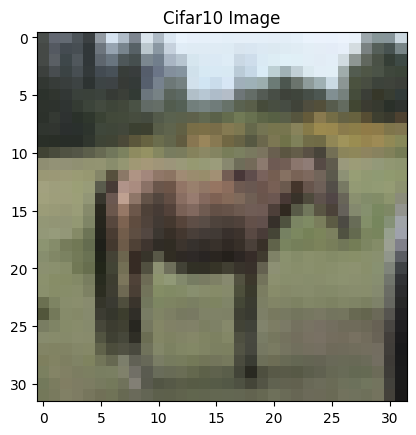

In [ ]:
import matplotlib.pyplot as plt

print(y_test[9999])
plt.imshow(x_test[9999])
plt.title('Cifar10 Image')
#plt.show()

층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, activation='relu', kernel_size=(3,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, activation='relu', kernel_size=(3,3)))
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3))) 
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
#              loss='mean_squared_error',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 [==============================] - 63s 39ms/step - loss: 1.4472 - accuracy: 0.4761
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1241 - accuracy: 0.6031
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9733 - accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8803 - accuracy: 0.6908
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8029 - accuracy: 0.7193
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7321 - accuracy: 0.7410
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6725 - accuracy: 0.7626
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6192 - accuracy: 0.7811
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.5635 - accuracy: 0.7994
Epoch 10/10
1563/1563 [==============================] - 58s 37m

[1.1089808940887451, 0.6633999943733215]